In [1]:
from collections import Counter

# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imblearn.datasets import make_imbalance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import EditedNearestNeighbours, NearMiss
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.metrics import geometric_mean_score
import seaborn as sns

In [2]:
def create_dataset(n_samples=5000, weights = (0.5,0.5), n_classes=2,
                   class_sep=0.01, n_clusters = 2):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes, 
                               flip_y = 0.1,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

In [3]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

In [4]:
from sklearn.model_selection import train_test_split
X, y = create_dataset (n_samples=5000, weights = (0.8, 0.2), class_sep=0.5)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1000, random_state=0)

# X_train = X_train.values
# y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values
print (X_train.shape)
print (X_test.shape)
print ("Rincian class pada data training {} dan testing {} " .format(Counter(y_train), Counter(y_test)))

(4000, 2)
(1000, 2)
Rincian class pada data training Counter({0: 3051, 1: 949}) dan testing Counter({0: 789, 1: 211}) 


In [5]:
y_train.shape

(4000,)

In [6]:
X_train.shape

(4000, 2)

In [7]:
new_data = np.column_stack((X_train,y_train))

In [8]:
new_data.shape

(4000, 3)

In [9]:
new_data = pd.DataFrame({'X1': new_data[:,0], 'X2': new_data[:,1], 'class': new_data[:,2]})

In [10]:
negatif = new_data.loc[new_data['class']==0]
positif = new_data.loc[new_data['class']==1]

negatif_points = negatif.drop('class', axis = 1)
positif_points = positif.drop('class', axis = 1)

negatif_points=np.array(negatif_points)
positif_points = np.array (positif_points)

In [11]:
from scipy.spatial import distance
Y = distance.cdist(positif_points, negatif_points, 'euclidean')

#mengurutkan hasil secara ascending
K = np.argsort(Y)
# print (Y)
# print ("Urutan data: \n", K)
Y.sort()
# print ("After short: \n", Y)
Y.shape

(949, 3051)

In [12]:
array_new = np.array(negatif_points[K[:,0:3]])
print (array_new.shape)
XX= array_new.transpose(0,1,2).reshape(array_new.shape[0]*array_new.shape[1],array_new.shape[2])
zeros_value = np.zeros((array_new.shape[0]*array_new.shape[1],1))
# print (ones_value.shape)
new_X = np.concatenate ((XX, zeros_value), axis=1)

# print (new_X.shape)
new_X= np.unique(new_X,axis=0)
print (new_X.shape)

(949, 3, 2)
(976, 3)


In [13]:
array_minority = np.array(positif)
joined_resampling = np.concatenate((array_minority,new_X), axis=0)

X_resample = joined_resampling[:,0:2]
y_resample = joined_resampling[:,2]

print ('Setelah undersampling, komponen data: {}' .format(Counter(y_resample)))

Setelah undersampling, komponen data: Counter({0.0: 976, 1.0: 949})


In [14]:
from sklearn.svm import SVC

svm = SVC(gamma='auto', kernel='rbf', C=1)
svm.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

float64


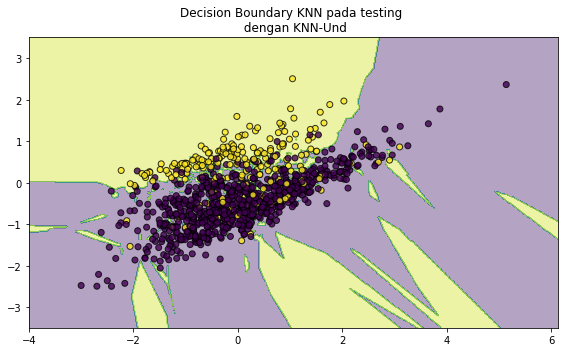

In [15]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1,figsize=(8,5))
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3)
classifier = knn.fit(X_resample,y_resample)
print (y_resample.dtype)
plt.title("Decision Boundary KNN pada testing \n dengan KNN-Und")
plot_decision_function(X_test,y_test,classifier,ax)
fig.tight_layout()

In [16]:
from imblearn.metrics import classification_report_imbalanced

svm_pred = svm.predict(X_test)

print (classification_report_imbalanced(y_test,svm_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.97      0.61      0.93      0.77      0.61       789
          1       0.83      0.61      0.97      0.70      0.77      0.57       211

avg / total       0.89      0.89      0.69      0.89      0.77      0.60      1000



In [17]:
y_resample.shape

(1925,)

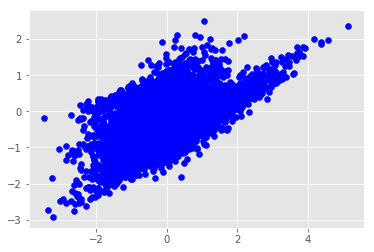

In [18]:
from matplotlib import style
style.use('ggplot')
plt.scatter (X[:, 0], X[:, 1], c='b')
plt.show()

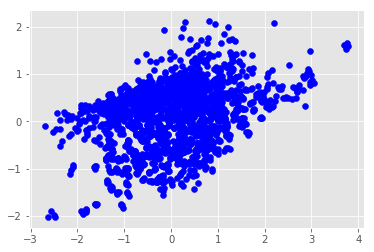

In [19]:
plt.scatter (X_resample[:, 0], X_resample[:, 1], c='b')
plt.show()

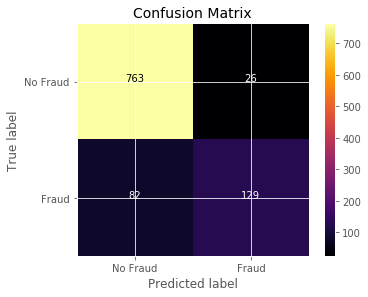

In [20]:
from sklearn.metrics import confusion_matrix

knn_cf = confusion_matrix(y_test, svm_pred)
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(5,4))

plot_confusion_matrix(knn_cf, labels, title="Confusion Matrix", cmap=plt.cm.inferno)